# 1.算法（模型）名称

In [1]:
# 完成人 ： 熊雷，张玺，李西凌，高任飞

## 1.1 算法（模型）的解读

### 1.1.1 算法的主要应用场景 

#### 预先说明

深度学习的本质就是各种神经网络，从最早最简单的感知机，再到多层神经网络，再到现在的CNN、RNN，其目的都是构建一个合适的神经网络结构，让机器有能力“自己思考”。
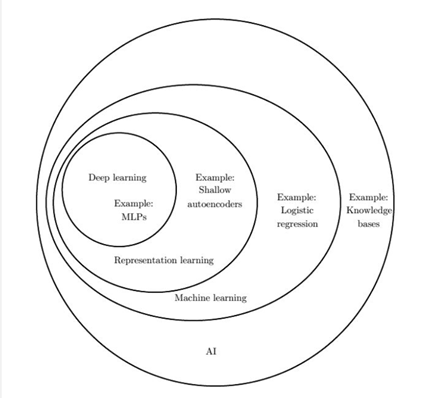

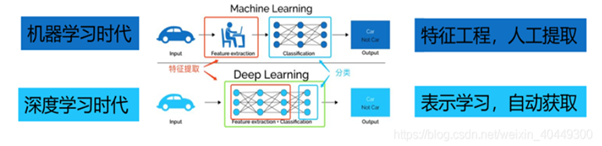

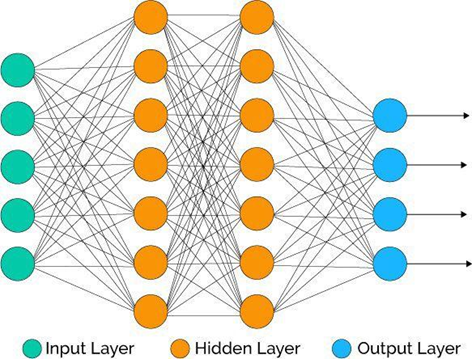

                        ANN（Artificial Neural Network）——MLP(Multi-Layer Perceptron)模型

MLP的问题：
1.面对高维或者大量数据时计算量过于庞大
2.易于出现过拟合现象，泛化能力不足

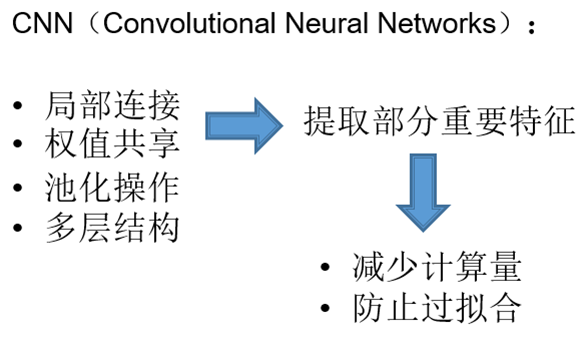

#### 本算法的主要应用场景有3类：  
（1）图像方面有图像识别，图像分类，图像主题生成，图像内容生成，物体标注等。
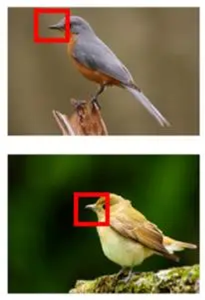

（2）音视频方面：音视频分类，音视频预测等  
（3）自然语言处理方面：对话生成，文本生成，机器翻译等
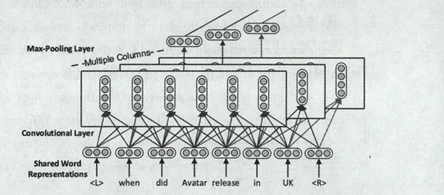

#### 本算法的应用前提：
需要大量的有标签的数据集作为支撑
存在分布较为稀疏的特征
在较复杂的情况下对特征面（feature map）的数量以及网络的深度有一定要求

适合分辨大小位置发生变化的图像与表达更为抽象的特征（相较于MLP模型）

#### 本算法不适用的情况：
有大量有价值信息并需要解释局部与整体的相关性时 （最大池化带来的问题）
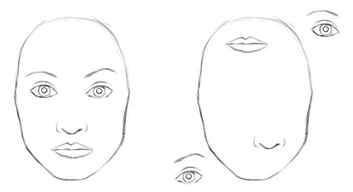

### 1.1.2 算法原理

算法原理如下:

    卷积神经网络组成：
        输入层——（卷积层——池化层）*n——全连接层—— Softmax 层
卷积神经网络整体来看分为两个过程，一是正向传播过程，二是反向传播过程

### 卷积
    一个过滤函数经过翻转和移动后与另一个函数的乘积的积分，公式如下：

![avatar](./conv.png)
    卷积可以帮助我们寻找特定的局部图像特征（例如边缘），以便以后在网络中使用。

    但事实上卷积神经网络的卷积是其实是互关联，是这两个函数的滑动的点积（dot product），过滤函数不经过翻转，它直接滑动通过函数 f。函数 f 和函数 g 的重合区域就是互关联。
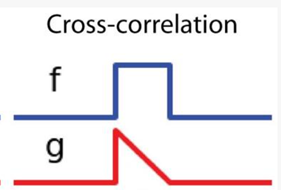

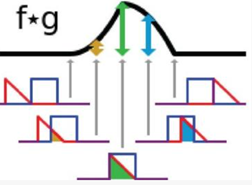

### 卷积层
    卷积层由一组滤波器组成，一个滤波器又由多个卷积核组成。每个卷积核是一个2维数组，每个滤波器含有卷积核的数量等于输入层的通道数。 可以把卷积核就理解为特征提取器，降低参数的数量，可以大大减小位置特征对结果的影响
    
     对于一个以一个n$\times$n$\times$x的RGB图像和m$\times$m$\times$x的滤波器为例，我们通过将滤波器与输入图像卷积来生成输出图像。具体做法：  
    1、首先将滤波器放置在图像的顶部，比如说左上角  
    2、将滤波器中卷积核矩阵和图像对应通道矩阵对应区域进行点乘，及对应位置元素相乘  
    3、x个卷积核分别应用到图像的x个通道，将点乘结果求和，结果就是目标通道像素的输出值  
    4、滤波器在图像上移动，在图像所有区域重复上述步骤，得到的输出值形成x个通道矩阵  
    5、将这x个通道矩阵合并到一起（对应元素相加），得到一个滤波器最终的输出矩阵 
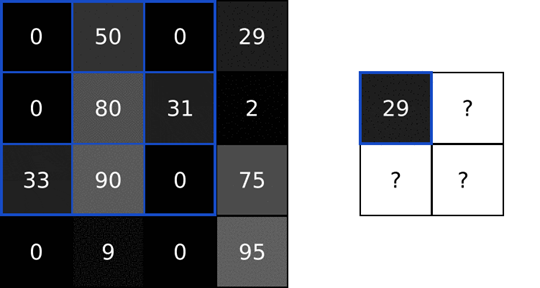

#### 权值共享：  
    使用相同卷积核进行卷积操作，从而实现了权值共享。
#### 局部视野感受：  
    每个神经元不需要对全部的图像做感受，只需要感受局部特征即可，在更高层将不同局部综合起来得到全局信息

### 池化层
    图像中的相邻像素往往具有相似的值，因此卷积层通常也会为输出中的相邻像素产生相似的值，通过池化层，可以进一步缩小最后全连接层中节点的个数，从而达到减少整个神经网络参数的目的。使用池化层既可以加快计算速度也可以防止过拟合。池化层filter的计算不是节点的加权和，而是采用最大值或者平均值计算。
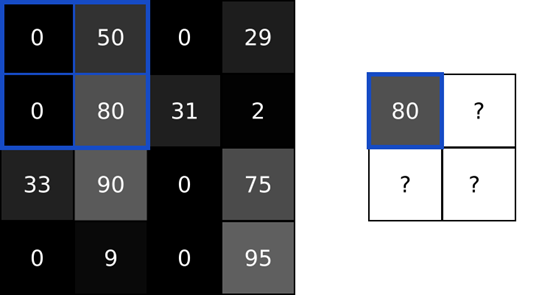
    
    通过avg、max等简单方法完成。用k*k的矩阵遍历上一步卷积层的输出

### Dropout层
    在训练过程中随机删除一些神经元，可有效防止过拟合。未被删除神经元输入按1/(1 - rate)的比例放大，以保持输入的总和不变。

### 全连接层
    给出分类结果，全连接的核心操作就是矩阵向量乘积，做特征加权。

    首先对于上一池化层输入的每一张特征图，都使用一个和图像大小一样的卷积核进行点积运算，这样整幅图就变成了一个数了，再将每个深度合并到一起，假设全连接层有k个卷积核，那么最终就会得到一个1*k的向量，方便交给最后的分类器（Softmax层）

### Softmax层
       全连接层的一种，一般处于CNN的最后一层，量化我们对预测的确信度，即图片属于不同分类的概率

   * Softmax函数计算如下：
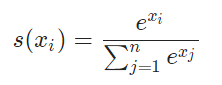
    它使所有的输出之和为1，因此，结果形成一个概率分布，从而判断图像分类的结果

### 损失函数loss
	损失函数其实表示的是真实值与网络的估计值的误差，知道误差了，才能知道怎样去修改网络中的权重。

* CNN采用交叉熵误差作为损失函数，计算公式如下：
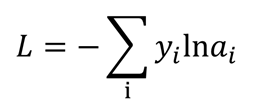

    I 代表softmax的第i个样本的输出值，y 是真实值。并且，y中只有真实值的索引为1，其他均为0 。因此，上式实际上只计算对应真实值的输出的自然对数  

    也就是说，交叉熵误差的值是由真实值所对应的输出结果决定的。

### 反向传播
    反向传播的就是将损失函数输出的误差从Softmax层开始反向传播，直至传播到输入层，在反向传播的过程中，根据误差调整各种参数的值；  
    不断迭代上述过程，直至收敛（损失函数最小）
    
* 本质：梯度下降法，利用链式法则求导可微目标函数来使其达到最小值
* 梯度：在多变量函数中，梯度就是分别对每个变量进行微分组成一个向量，其方向就指出了函数在给定点的上升最快的方向  

     例如：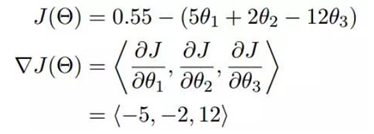
     
#### 各层计算方法如下：

* Softmax层：
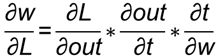

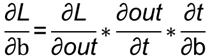

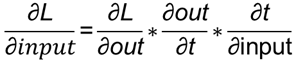

* 池化层  
    每个梯度值都分配给原始最大值所在的位置，其他每个值均为零。
    

* 卷积层
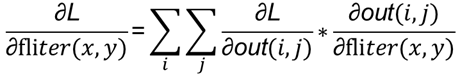

### 1.1.3 算法参数

我们使用Keras构建CNN  
由于本次展示训练的是2D的CNN，所以我们只需要使用Keras Sequential 顺序模型，而不需要使用Keras 函数式 API 来定义复杂模型。  
顺序模型是多个网络层的线性堆叠。所以构建一个Sequential模型其实是堆叠多个网络层（layer）的过程。  
模型参数：  
#### 1. 创建layer形成网络：  
(1)输入层:  
Input_shape:它是一个表示尺寸的元组 (一个由整数或 None 组成的元组，其中 None 表示可能为任何正整数)。  

(2)卷积层：  
包括：Conv1D、Conv2D、Conv3D  
以Conv2D为例：  
filters: 整数，输出空间的维度 （即卷积中滤波器的输出数量）。   
kernel_size: 一个整数，或者 2 个整数表示的元组或列表， 指明 2D 卷积窗口的宽度和高度。 可以是一个整数，为所有空间维度指定相同的值。   
strides: 一个整数，或者 2 个整数表示的元组或列表， 指明卷积沿宽度和高度方向的步长。 可以是一个整数，为所有空间维度指定相同的值。 指定任何 stride 值 != 1 与指定 dilation_rate 值 != 1 两者不兼容。   
padding: 填充，"valid" 或 "same" (大小写敏感)。     
dilation_rate: 一个整数或 2 个整数的元组或列表， 指定膨胀卷积的膨胀率。 可以是一个整数，为所有空间维度指定相同的值。 当前，指定任何 dilation_rate 值 != 1 与 指定 stride 值 != 1 两者不兼容。    
activation: 要使用的激活函数 。 如果你不指定，则不使用激活函数 (即线性激活： a(x) = x)。   
use_bias: 布尔值，该层是否使用偏置向量。    
kernel_initializer: kernel 权值矩阵的初始化器 。  
bias_initializer: 偏置向量的初始化器 。   
kernel_regularizer: 运用到 kernel 权值矩阵的正则化函数 。  
bias_regularizer: 运用到偏置向量的正则化函数 。  
activity_regularizer: 运用到层输出（它的激活值）的正则化函数 。  
kernel_constraint: 运用到 kernel 权值矩阵的约束函数 。  
bias_constraint: 运用到偏置向量的约束函数 。  

(3)池化层：  
池化层和卷积层一样，根据维度的把不同可以分为3种池化层。  
这里以MaxPooling2D为例：  
keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)   
参数：  
pool_size: 整数，或者 2 个整数表示的元组， 沿（垂直，水平）方向缩小比例的因数。 （2，2）会把输入张量的两个维度都缩小一半。 如果只使用一个整数，那么两个维度都会使用同样的窗口长度。  
strides: 整数，2 个整数表示的元组，或者是 None。 表示步长值。 如果是 None，那么默认值是 pool_size。  
padding:与卷积层参数含义相同。  
data_format:与卷积层参数含义相同  

（4）全连接层：  
在构建全连接层之前，我们需要对之前的网络进行一些操作：  
##### 首先是扁平化Flatten，我的理解就是将之前的多维的网络拉伸成一个一维的张量（可以类似理解成向量的意思）。  
keras.layers.Flatten(data_format=None)  
参数含义：  
data_format:与之前的卷积层，池化层的同名参数同义   
##### 然后是Dropout，即遗忘层：  
keras.layers.Dropout(rate, noise_shape=None, seed=None)  
参数含义：  
rate: 在 0 和 1 之间浮动。需要丢弃的输入比例。  
noise_shape: 1D 整数张量， 表示将与输入相乘的二进制 dropout 层的形状。   
seed: 一个作为随机种子的 Python 整数。  
##### 在Flatten和Dropout之后是全连接层的构建：  
layers.Dense(units = num_classes, activation="softmax")  
Dense 实现以下操作：output = activation(dot(input, kernel) + bias) 其中 activation 是按逐个元素计算的激活函数，kernel 是由网络层创建的权值矩阵，以及 bias 是其创建的偏置向量 (只在 use_bias 为 True 时才有用)。  
参数：  
units: 正整数，输出空间维度。  
Activation、use_bias:、kernel_initializer、bias_initializer、kernel_regularizer、bias_regularizer、activity_regularizer、kernel_constraint、bias_constraint：与卷积层同名参数含义也相同。 

#### 2. 训练模型：
在训练模型之前，我们需要配置学习过程，这是通过 compile ()方法完成的。  
其参数包括：  
优化器 optimizer：它可以是现有优化器的字符串标识符，如 rmsprop 或 adagrad，也可以是 Optimizer 类的实例。  
损失函数 loss：模型试图最小化的目标函数。它可以是现有损失函数的字符串标识符，如 categorical_crossentropy 或 mse，也可以是一个目标函数。  
评估标准 metrics：对于任何分类问题，都将其设置为 metrics = ['accuracy']。评估标准可以是现有的标准的字符串标识符，也可以是自定义的评估标准函数。  


在配置完学习过程之后，我们使用fit()方法来对模型进行训练。  
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)  
参数：  
x: 输入数据。  
y: 目标数据。  
batch_size: 整数或 None，每次梯度更新的样本数，如果未指定，默认为 32。  
epochs: 整数，训练模型迭代轮次，一个轮次是在整个 x 或 y 上的一轮迭代。  
callbacks: 一系列的 keras.callbacks.Callback 实例。一系列可以在训练和验证（如果有）时使用的回调函数。   
validation_split: 0 和 1 之间的浮点数。用作验证集的训练数据的比例。  

### 1.1.4 输入数据的准备方法

需要对输入数据进行以下处理：  
（1）数据类型转换  
（2）数据的标准化处理  
（3）训练集和测试集的划分  

### 1.1.5 输出结果的评价方法

指标名称及其含义或其他方式

## 1.2 算法应用示例

### 1.2.1 业务理解

本例题涉及的业务为手写数字识别

本例题的：
（1）输入为：28*28的手写数字灰度图像
（2）输出为：手写数字分类结果
（3）处理算法/模型为：CNN

### 1.2.2 数据理解

In [6]:
#Minist
#输入字段的名称
#输出字段的名称


### 1.2.3 数据准备

In [3]:
from __future__ import print_function
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.utils.vis_utils import plot_model
import keras.backend as K
from keras.callbacks import LearningRateScheduler
import pydot
import matplotlib.pylab as plt

In [4]:
#本例题需要对MNIST数据集进行，如下预处理工作：
#（1)定义输入数据的形状和分类数
num_classes = 10
#分类数
input_shape = (28, 28, 1)
#定义输入形状
#（2）导入MNIST数据集
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#print(x_train.shape)
#（3）数据标准化
# 将图像缩放到[0,1]范围
#/255：因为图像的位数通常是8位，2^8 = 256种，用0-255的数值来表示每一种深度
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
#np.expand_dims增加维度，-1：从最后增加
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
#（4）将向量转化成二维矩阵
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### 1.2.4 模型训练及调参

In [5]:
#模型构建
num_filters_1 = 32   #卷积核数量1
num_filters_2 = 64   #卷积核数量2
kernel_size =(3,3)
model = keras.Sequential(   #创建Sequential模型的有两种，一种是使用列表将网络层参数传给Sequential对象，第二种是使用add()方法
    [
        keras.Input(shape=input_shape),  
        layers.Conv2D(
            num_filters_1, 
            kernel_size, 
            strides=1,
            padding="valid",
            activation="relu",
            use_bias=True,
            bias_initializer=keras.initializers.Zeros()
        ),
        #卷积层:
        #滤波器数量：32；滤波器大小：3*3二维矩阵；步长为1；padding="valid"：无填充,则输出形状为（input_shape-kernel_size）/strides+1
        #activation：激活函数使用rule： max(x, 0)。
        layers.MaxPooling2D(
            pool_size=(2, 2), strides=None, padding="valid"),
        #最大池化层：筛选出范围内最大值，大小2*2；步长如果为None，则默认为pool_size
        layers.Conv2D(
            num_filters_2, 
            kernel_size, 
            strides=1,
            padding="valid",
            activation="relu"),
        layers.MaxPooling2D(
            pool_size=(2, 2), strides=None, padding="valid"),
        #第二次卷积池化过程
        layers.Flatten(),
        #扁平化输出 而全连接层的输入为向量，所以在进行全连接层之前，要将多个特征矩阵“压平”为一个向量。
        layers.Dropout(rate = 0.5),
        #dropput层，训练过程中随机删除神经元防止过度拟合,rate:0到1浮点数，舍弃的部分占比
        layers.Dense(units = num_classes, activation="softmax"),
        #全连接层，得到最终输出。units：输出空间维数，等于分类数
        #activation：激活函数，Softmax将任意实数值转换为概率
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [6]:
#训练模型

#配置学习过程
model.compile(
    loss="categorical_crossentropy",
    #损失函数，交叉熵损失
    optimizer="adam",
    #优化器，adam是梯度下降法的一种（adam是自适应学习率的优化器，所以我们不需要手动调参）
    metrics=["accuracy"])


#小批量优化算法
batch_size = 128 #"None"默认为32
#批次大小
epochs = 10
#训练次数

hist=model.fit(x_train,
          y_train,
          batch_size=batch_size,
          epochs=epochs, 
          validation_split=0.1,
  )

Epoch 1/10
422/422 [==============================] - 20s 47ms/step - loss: 0.3761 - accuracy: 0.8857 - val_loss: 0.0819 - val_accuracy: 0.9787
Epoch 2/10
422/422 [==============================] - 19s 45ms/step - loss: 0.1084 - accuracy: 0.9661 - val_loss: 0.0598 - val_accuracy: 0.9832
Epoch 3/10
422/422 [==============================] - 19s 46ms/step - loss: 0.0843 - accuracy: 0.9739 - val_loss: 0.0466 - val_accuracy: 0.9872
Epoch 4/10
422/422 [==============================] - 19s 46ms/step - loss: 0.0713 - accuracy: 0.9780 - val_loss: 0.0422 - val_accuracy: 0.9888
Epoch 5/10
422/422 [==============================] - 19s 46ms/step - loss: 0.0627 - accuracy: 0.9807 - val_loss: 0.0386 - val_accuracy: 0.9898
Epoch 6/10
422/422 [==============================] - 19s 46ms/step - loss: 0.0546 - accuracy: 0.9822 - val_loss: 0.0388 - val_accuracy: 0.9885
Epoch 7/10
422/422 [==============================] - 20s 48ms/step - loss: 0.0503 - accuracy: 0.9845 - val_loss: 0.0353 - val_accuracy:

### 1.2.5 模型评价及优化

In [7]:
#评价方法
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print(score)

Test loss: 0.02739007957279682
Test accuracy: 0.9902999997138977
[0.02739007957279682, 0.9902999997138977]


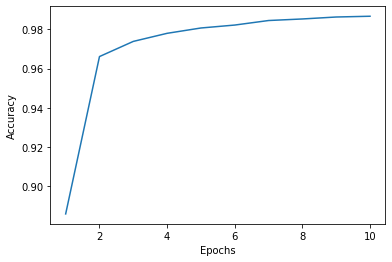

In [8]:
plt.plot(range(1, epochs+1), hist.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [9]:
#优化方法
K.get_value(model.optimizer.lr)#查看学习率

0.001

### 1.2.6 模型应用及预测

In [10]:
#预测结果
def print_label(pre):
    j=-100
    for i in range(0,10):
        if pre[0][i]>j:
            j=pre[0][i]
            ans=i
    print("label: "+str(ans))

In [11]:
prediction=model.predict(x_test[:1])
print_label(prediction)

label: 7


## 1.3 参考文献及其他

In [34]:
#[1]周飞燕,金林鹏,董军.卷积神经网络研究综述[J].计算机学报,2017,40(06):1229-1251.
#[2]李彦冬,郝宗波,雷航.卷积神经网络研究综述[J].计算机应用,2016,36(09):2508-2515+2565.
#[3]Keras官方文档 https://keras.io/api/

In [12]:
#其他需要补充说明的问题

CNN需要注意的事项：  
1）数据集的大小和分块  
2）数据预处理  
3）数据规则化  
4）网络权值初始化  
5）反向传播的学习速率  
 

Sequetial模型不适用的情况：  
你的模型有多个输入或者多个输出量  
模型的任一层有多个输入或者输出量  
需要完成分层共享时  
需要一个非线性拓扑结构时（如残差链接、多分支模型）  